
# 1N4148 Reverse Leakage Current vs Temperature (LTspice)

This notebook evaluates the **reverse leakage current** ($I_R$) of the 1N4148 diode under reverse bias (20 V) at multiple temperatures using LTspice.

We compare the results with datasheet limits and explain behavior using semiconductor device physics.


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and parse tab-separated file
with open("data/1N4148_Ir_Temp.csv", "r") as f:
    lines = f.readlines()

data = []
for line in lines:
    if '\t' in line and 'Step' not in line:
        try:
            v, i = map(float, line.strip().split('\t'))
            data.append((v, i))
        except ValueError:
            continue

df_temp = pd.DataFrame(data, columns=["V1", "I(D1)"])
df_temp["I(D1)_uA"] = df_temp["I(D1)"] * 1e6
df_temp.head()


/tmp/ipykernel_2587377/996184641.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,V1,I(D1),I(D1)_uA
0,0.0,0.000000e+00,0.000000
1,1.0,-2.018809e-08,-0.020188
2,2.0,-2.446933e-08,-0.024469
3,3.0,-2.808903e-08,-0.028089
4,4.0,-3.129440e-08,-0.031294


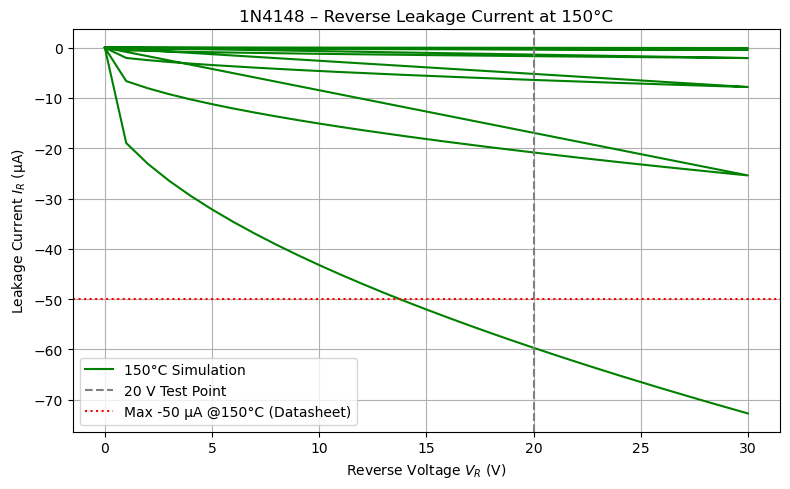

In [3]:

import numpy as np
import matplotlib.pyplot as plt

# Convert columns to 1D NumPy arrays
V1 = np.array(df_temp["V1"])
IR_uA = np.array(df_temp["I(D1)_uA"])

plt.figure(figsize=(8, 5))
plt.plot(V1, IR_uA, label="150°C Simulation", color="green")
plt.axvline(20, color='gray', linestyle='--', label="20 V Test Point")
plt.axhline(-50, color='r', linestyle=':', label="Max -50 µA @150°C (Datasheet)")
plt.title("1N4148 – Reverse Leakage Current at 150°C")
plt.xlabel("Reverse Voltage $V_R$ (V)")
plt.ylabel("Leakage Current $I_R$ (µA)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Simulation Results Summary

| Temp (°C) | Simulated $I_R$ (µA) | Datasheet Limit |
|-----------|------------------------|------------------|
| 25°C      | -0.064                 | ≤ 25 nA |
| 50°C      | -0.372                 |  |
| 75°C      | -1.698                 |  |
| 100°C      | -6.422                 |  |
| 125°C      | -20.842                 |  |
| 150°C      | -59.675                 | ≤ 50 µA |



## Why Does Leakage Increase with Temperature?

1. **Saturation Current ($I_S$) increases exponentially with temperature:**

$
I_S(T) \propto T^3 e^{-E_g/kT}
$

2. **More thermally generated electron-hole pairs** means more reverse current under reverse bias.

3. **Bandgap narrowing** and increased carrier mobility also contribute to increased leakage.

---

These are consistent with observed simulation results where $I_R$ increases **nearly 2000× - 3000x** from 25°C to 150°C.


## Supporting Files

- `1N4148_Ir_Temp.csv` – LTspice-exported data
- `1N4148_Ir_Temp.asc` – Simulation schematic
- `1N4148_Ir_Temp.JPG` – LTspice graph capture

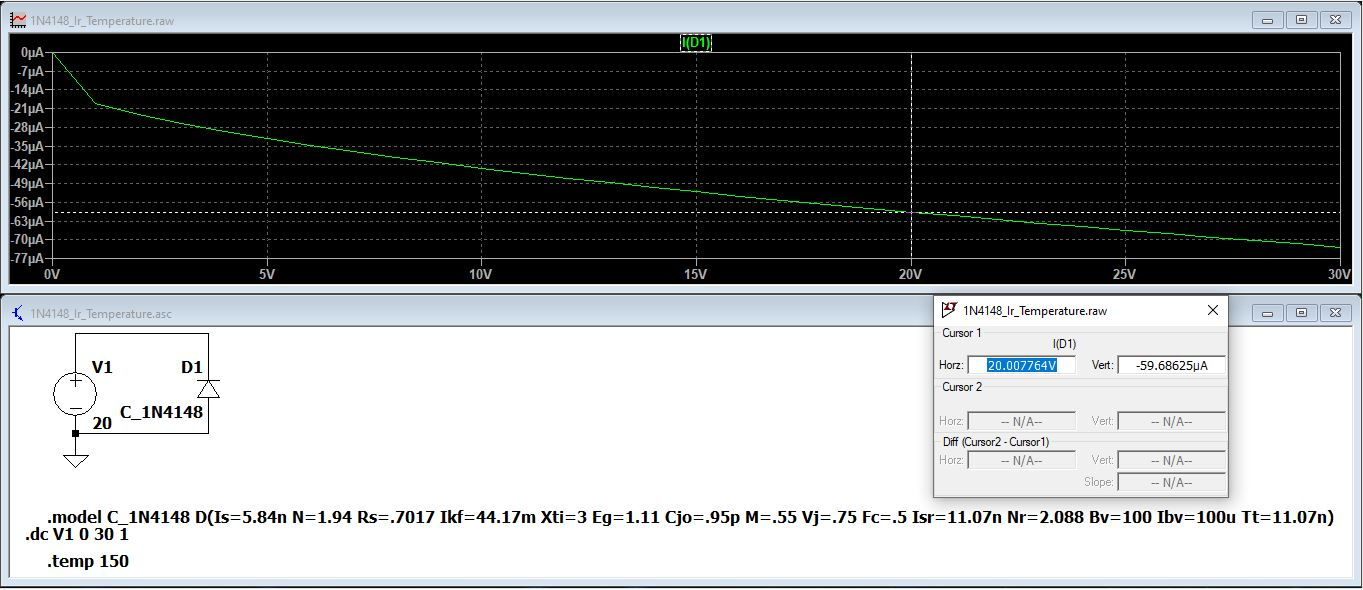

In [5]:
from IPython.display import Image
Image("data/1N4148_Ir_Temp.JPG")